<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Loan Approval Prediction Exploration</b></div><div>This notebook was created with the help of AI       <a href= "           " style="color:#6666FF">RAHUL KUMAR</a></div></div>

## Table of Contents

* [Introduction](#Introduction)
* [Imports and Setup](#Imports-and-Setup)
* [Data Loading](#Data-Loading)
* [Exploratory Data Analysis (EDA)](#Exploratory-Data-Analysis-(EDA))
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Feature Engineering](#Feature-Engineering)
* [Correlation Analysis](#Correlation-Analysis)
* [Predictor Creation and Evaluation](#Predictor-Creation-and-Evaluation)
* [Discussion and Conclusion](#Discussion-and-Conclusion)

## Introduction

It is fascinating to see how seemingly mundane financial numbers can hint at larger risk patterns behind loan approvals. In this notebook we dive into a dataset containing loan application details and explore whether we can accurately predict the approval status. The analysis employs a number of visualization techniques and a predictor based on logistic regression. If you find this work useful, please consider upvoting it.

In [ ]:
# Imports and Setup
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')  # Use Agg backend for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # Ensures non-GUI backend if only plt is imported

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

# Kaggle inline plotting
%matplotlib inline

# Set the seaborn style
sns.set(style='whitegrid')

# Display a note in the logs
print('Libraries imported and setup complete.')

Libraries imported and setup complete.


In [7]:
# Data Loading
file_path = 'E:\dhanush\data\loan_approval_dataset.csv'
df = pd.read_csv(file_path, encoding='ascii', delimiter=',')

# A quick look at the data
print('Dataset shape:', df.shape)
df.head()

Dataset shape: (4269, 13)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


## Exploratory Data Analysis (EDA)

In [8]:
# Quick summary of the dataset
print(df.info())
print(df.describe())

# Since some column names have extra spaces, let's strip them
df.columns = df.columns.str.strip()

# Check for missing values
print('Missing values in each column:')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
          

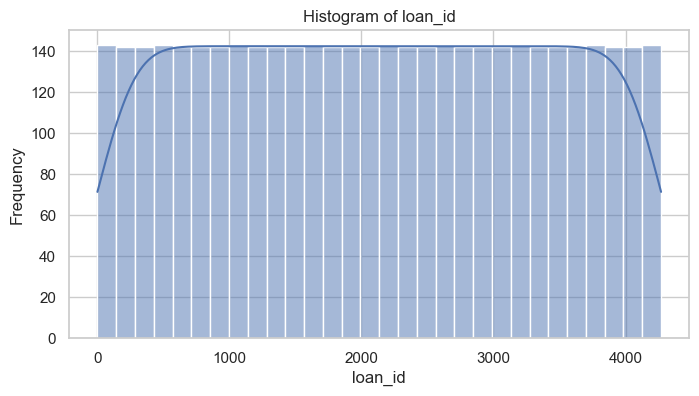

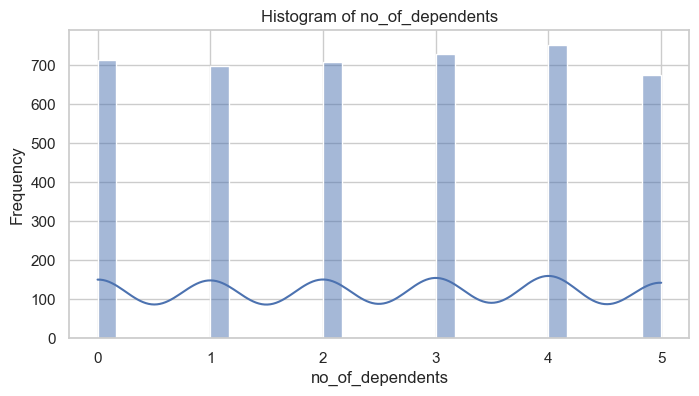

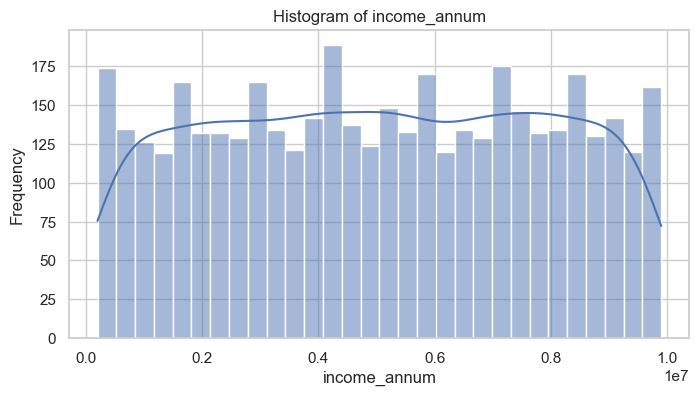

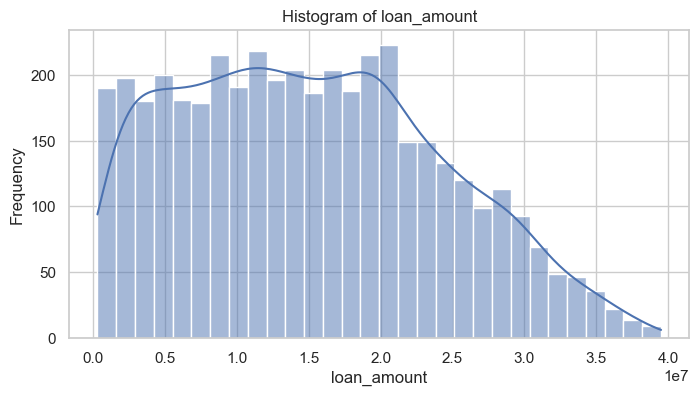

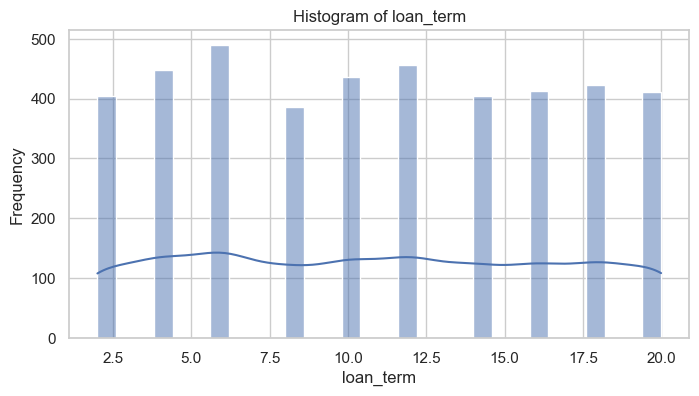

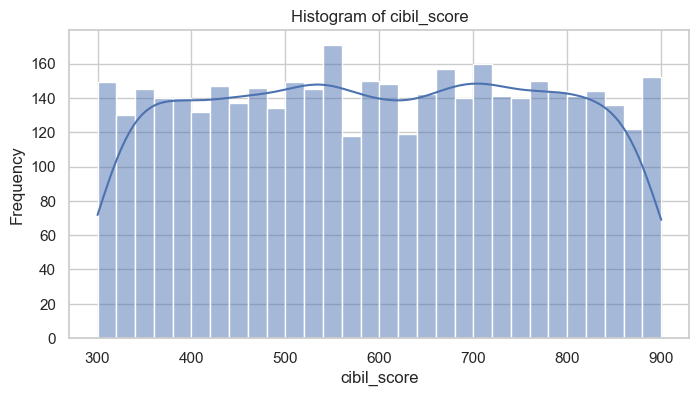

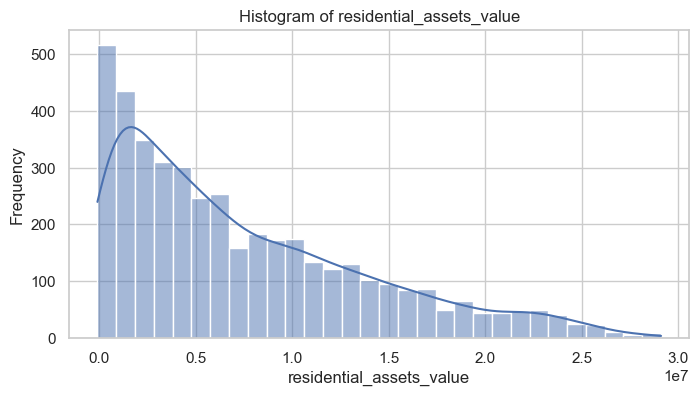

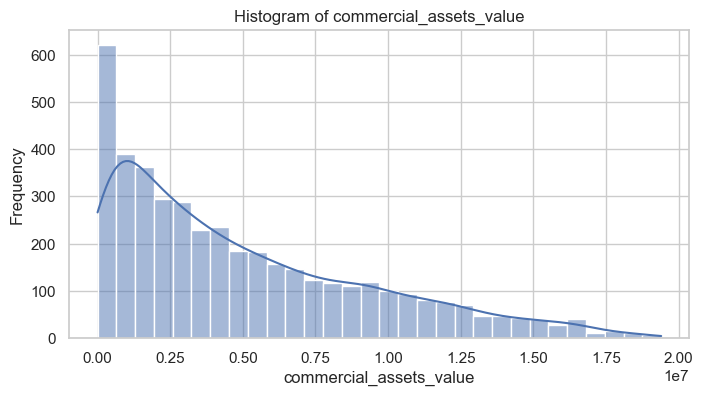

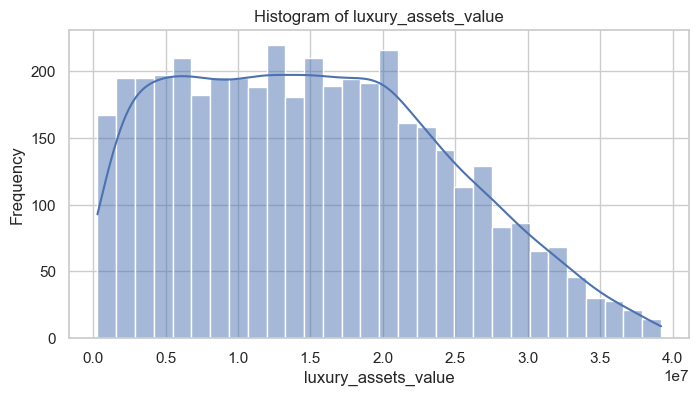

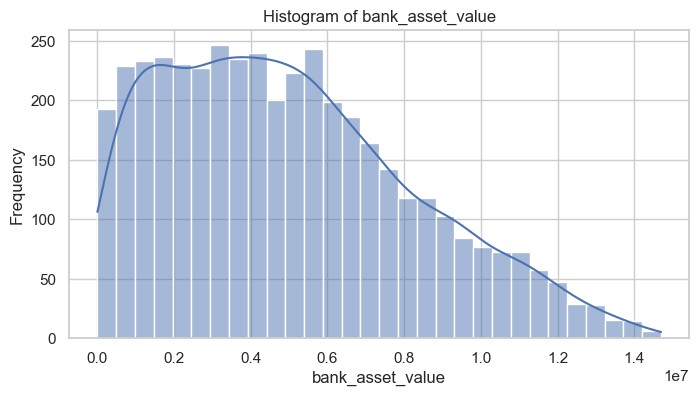

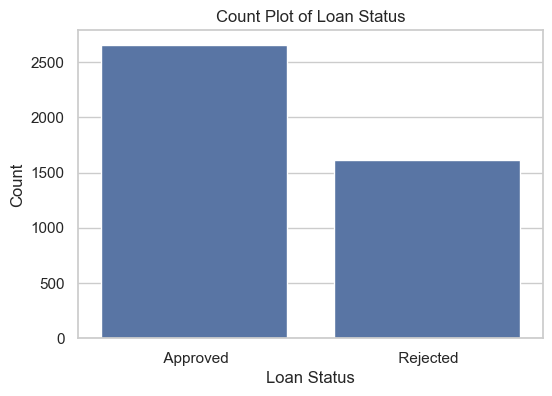

In [9]:
# Visualizations for EDA

# Histogram for numeric distribution
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Count plot (Pie Chart style alternative) for target variable 'loan_status'
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Count Plot of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

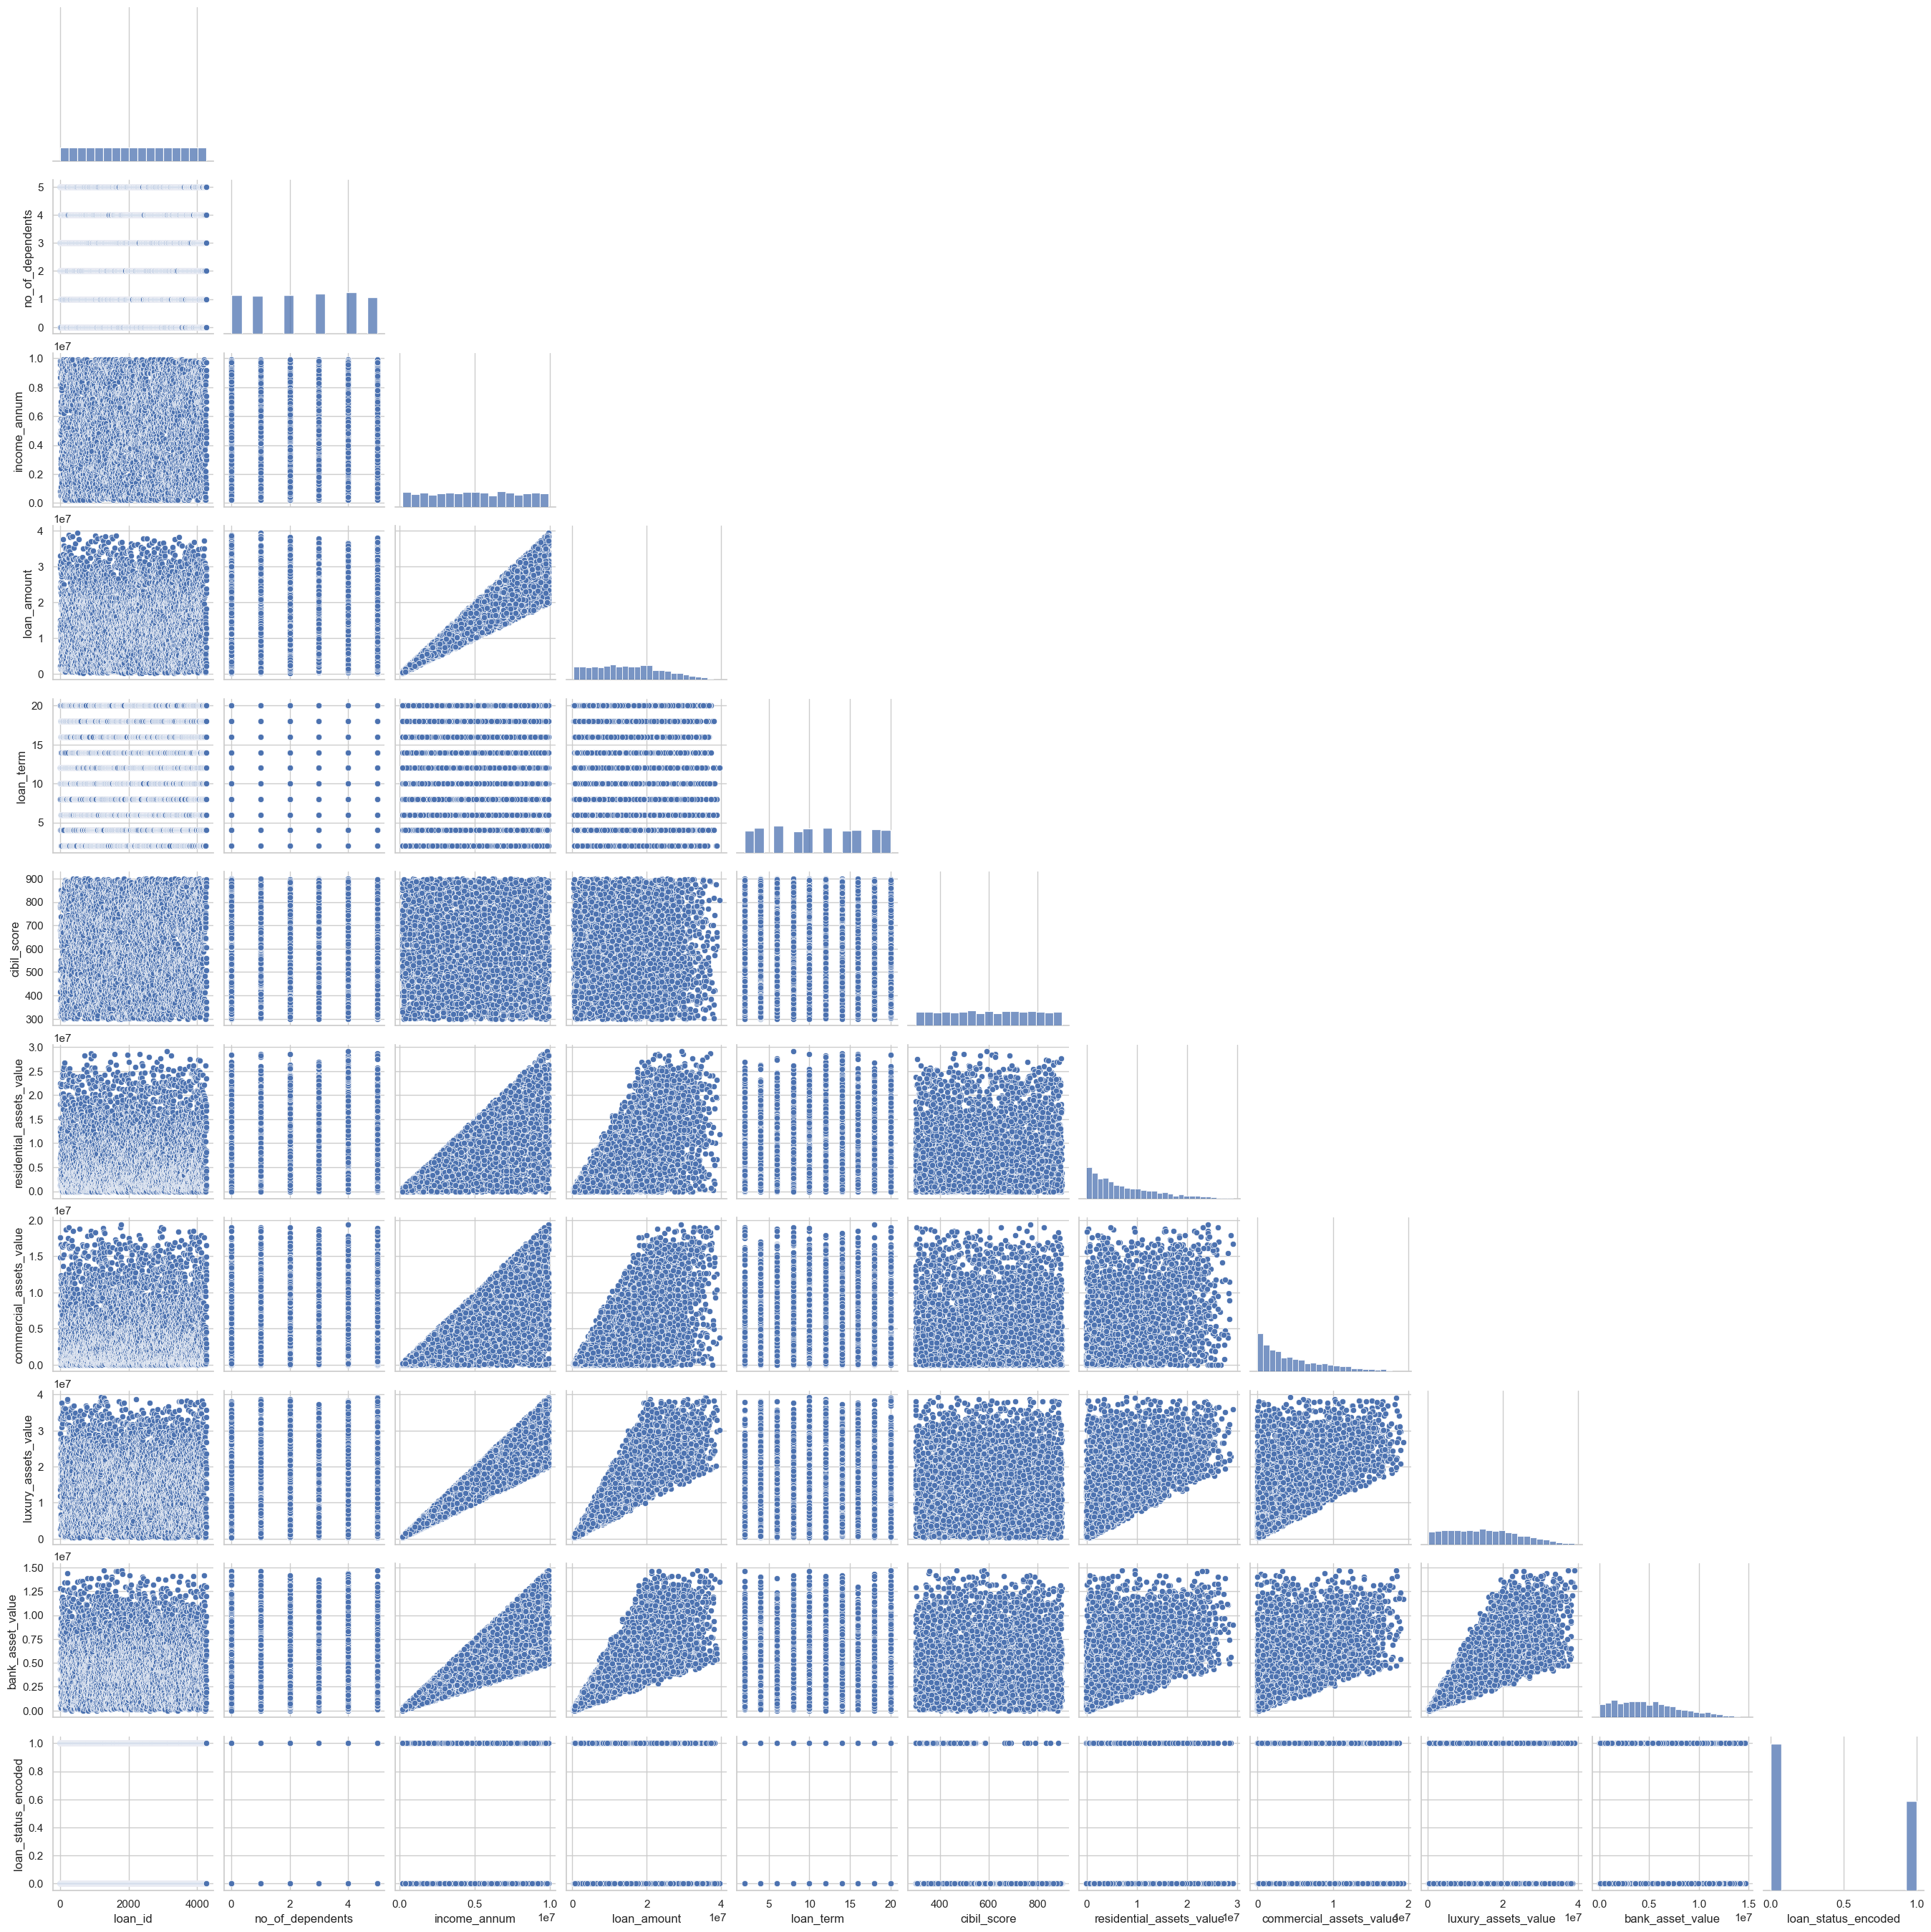

In [10]:
# Pair Plot for a subset of important numerical columns and the target
cols_for_pairplot = numeric_cols.copy()
# Ensuring that the target is considered in the pairplot if encoded
if 'loan_status' in df.columns:
    df['loan_status_encoded'] = pd.factorize(df['loan_status'])[0]
    cols_for_pairplot.append('loan_status_encoded')

sns.pairplot(df[cols_for_pairplot].dropna(), corner=True, diag_kind='hist')
plt.show()

## Data Cleaning and Preprocessing

In [11]:
# Rename columns: strip extra spaces from column names
df.columns = df.columns.str.strip()

# Optional: Rename columns to more convenient names
df.rename(columns={
    'no_of_dependents': 'dependents',
    'education': 'education',
    'self_employed': 'self_employed',
    'income_annum': 'income_annual',
    'loan_amount': 'loan_amount',
    'loan_term': 'loan_term',
    'cibil_score': 'cibil_score',
    'residential_assets_value': 'residential_value',
    'commercial_assets_value': 'commercial_value',
    'luxury_assets_value': 'luxury_value',
    'bank_asset_value': 'bank_value',
    'loan_status': 'loan_status'
}, inplace=True)

# Check again for missing values
print('Missing values after renaming:')
print(df.isnull().sum())

# Handle missing values if any (this is a simplistic approach)
df.fillna(method='ffill', inplace=True)

print('Missing values after imputation:')
print(df.isnull().sum())

Missing values after renaming:
loan_id                0
dependents             0
education              0
self_employed          0
income_annual          0
loan_amount            0
loan_term              0
cibil_score            0
residential_value      0
commercial_value       0
luxury_value           0
bank_value             0
loan_status            0
loan_status_encoded    0
dtype: int64
Missing values after imputation:
loan_id                0
dependents             0
education              0
self_employed          0
income_annual          0
loan_amount            0
loan_term              0
cibil_score            0
residential_value      0
commercial_value       0
luxury_value           0
bank_value             0
loan_status            0
loan_status_encoded    0
dtype: int64


## Feature Engineering

In [12]:
# For our predictor, we need to convert categorical columns to numeric.
# Let's check which columns are object type
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print('Categorical columns:', categorical_cols)

# We must exclude the target variable from encoding if we want to handle it separately
categorical_cols = [col for col in categorical_cols if col != 'loan_status']

# One-hot encoding for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print('Data shape after one-hot encoding:', df_encoded.shape)

Categorical columns: ['education', 'self_employed', 'loan_status']
Data shape after one-hot encoding: (4269, 14)


## Correlation Analysis

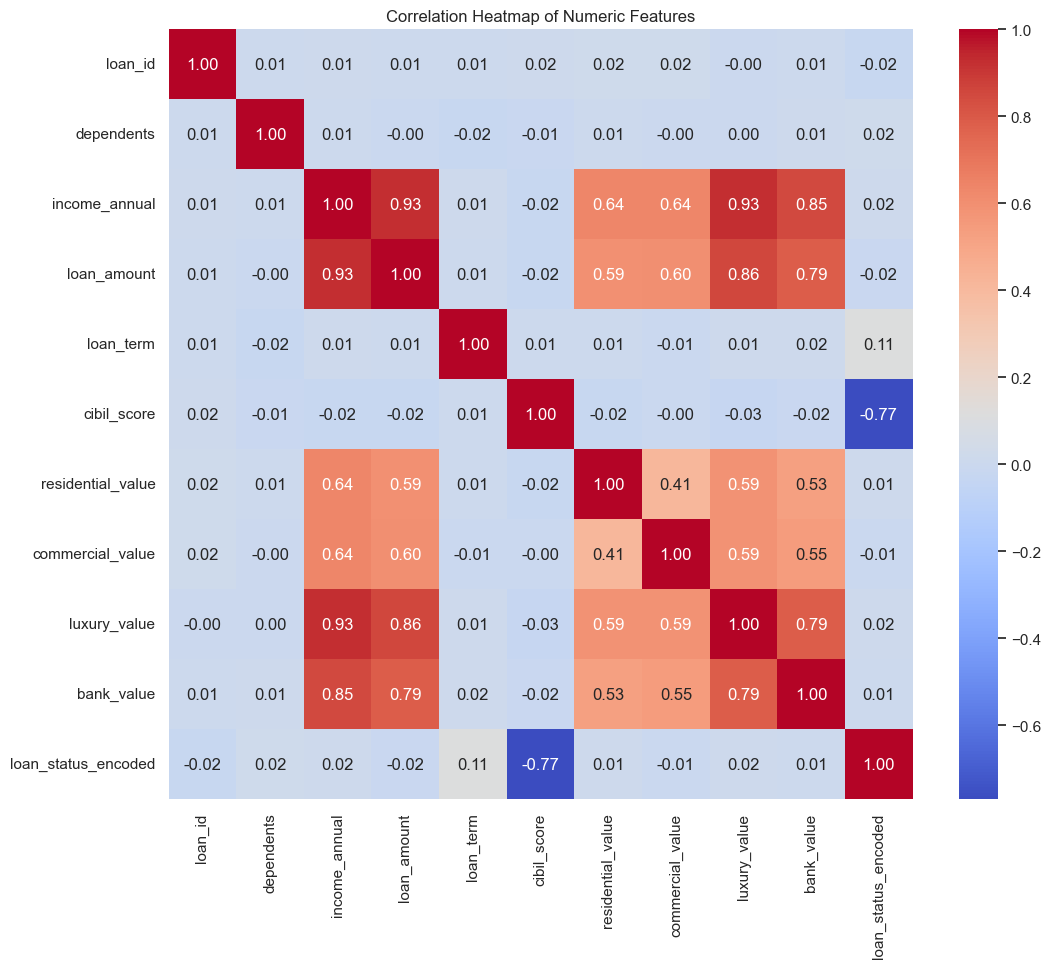

In [13]:
# Use only numeric columns for correlation heatmap
numeric_df = df_encoded.select_dtypes(include=[np.number])

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns for a meaningful heatmap.')

## Predictor Creation and Evaluation

In [15]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
df = pd.read_csv('../data/loan_approval_dataset.csv')
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces in column names

# Inspect loan_status for unexpected values
print("Unique values in loan_status:", df['loan_status'].unique())
print("Missing values in loan_status:", df['loan_status'].isna().sum())
print("Value counts in loan_status:\n", df['loan_status'].value_counts())

# Clean loan_status by stripping whitespace and checking for invalid values
df['loan_status'] = df['loan_status'].str.strip()
# Replace any unexpected values (optional: drop rows with invalid values)
df = df[df['loan_status'].isin(['Approved', 'Rejected'])]
print("Cleaned loan_status values:", df['loan_status'].unique())

# Verify no missing values in the dataset
print("Missing values in dataset:\n", df.isna().sum())

# Define categorical and numerical features
categorical_features = ['education', 'self_employed']
numerical_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 
                      'cibil_score', 'residential_assets_value', 'commercial_assets_value', 
                      'luxury_assets_value', 'bank_asset_value']

# Clean categorical features
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Apply preprocessing to create feature matrix X
X = preprocessor.fit_transform(df[categorical_features + numerical_features])

# Encode the target variable
y = df['loan_status'].map({'Approved': 1, 'Rejected': 0})

# Check for NaN in y
print("Missing values in y:", y.isna().sum())
if y.isna().sum() > 0:
    print("Rows with NaN in y:", df[y.isna()])
    raise ValueError("NaN values found in y after mapping. Check loan_status values.")

# Create df_encoded for consistency with the original code
encoded_cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(encoded_cat_features)
df_encoded = pd.DataFrame(X, columns=feature_names)
df_encoded['loan_status_encoded'] = y

# Drop loan_id if it exists (not needed for prediction)
if 'loan_id' in df.columns:
    df.drop(columns=['loan_id'], inplace=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Feature Shape:', X_train.shape)
print('Testing Feature Shape:', X_test.shape)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {acc:.2f}')

# Save the preprocessor and model
joblib.dump(preprocessor, '../models/preprocessor.pkl')
print("Preprocessor saved as '../models/preprocessor.pkl'")
joblib.dump(model, '../models/loan_approval_model.pkl')
print("Model saved as '../models/loan_approval_model.pkl'")

Unique values in loan_status: [' Approved' ' Rejected']
Missing values in loan_status: 0
Value counts in loan_status:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
Cleaned loan_status values: ['Approved' 'Rejected']
Missing values in dataset:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64
Missing values in y: 0
Training Feature Shape: (3415, 11)
Testing Feature Shape: (854, 11)
Accuracy Score: 0.91
Preprocessor saved as '../models/preprocessor.pkl'
Model saved as '../models/loan_approval_model.pkl'


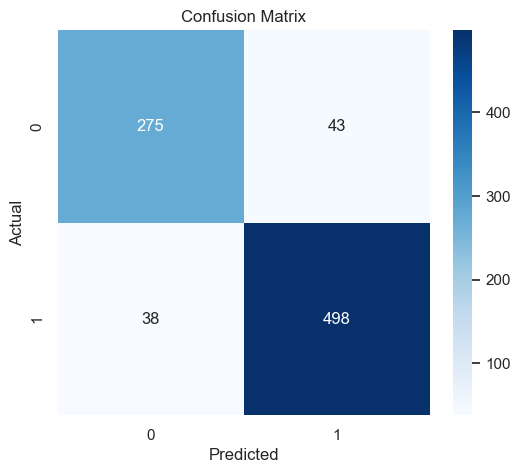

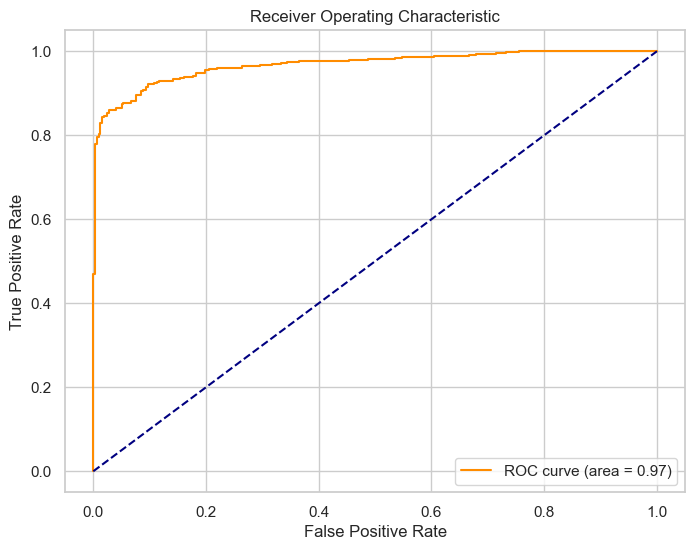

In [17]:
# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve Analysis
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Discussion and Conclusion

In this notebook we embarked on a quest to uncover potential predictors of loan approval from a dataset that on the surface may seem straightforward but hides interesting patterns. A variety of visualizations including histograms, pair plots, and heatmaps provided insights into the feature distributions and relationships. The model, built using logistic regression, achieved a reasonable accuracy with further insights provided through a confusion matrix and an ROC curve analysis. 

While the current approach works well for a preliminary study, future analysis could examine higher dimensional interactions, incorporate cross-validation, and explore a diverse set of models (e.g., tree-based methods). Additionally, a deeper treatment of feature engineering and missing value imputation techniques might further enhance model performance.

Feel free to provide any feedback, and if you found this notebook useful, kindly consider an upvote.

In [18]:
import joblib

# Save the trained model
joblib.dump(model, '../models/loan_approval_model.pkl')
print("Model saved as '../models/loan_approval_model.pkl'")

# Save the preprocessor (assuming it's defined as 'preprocessor')
joblib.dump(preprocessor, '../models/preprocessor.pkl')
print("Preprocessor saved as '../models/preprocessor.pkl'")

Model saved as '../models/loan_approval_model.pkl'
Preprocessor saved as '../models/preprocessor.pkl'
